In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
file_path = 'D:/UNCC/UNCC ML/Project/new.csv'
data = pd.DataFrame(pd.read_csv(file_path))
data.head(3)

,Unnamed: 0,Code,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),...,Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Kilotons of Co2,Metric Tons Per Capita,Population Growth Rate
0,3,1.0,2004.0,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,...,1.20,1.414118,211.382074,60.0,652230.0,33.93911,67.709953,1030.0,0.04,4.321560
1,4,1.0,2003.0,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,...,1.40,8.832278,190.683814,60.0,652230.0,33.93911,67.709953,1220.0,0.05,4.668344
2,5,1.0,2005.0,25.390894,12.2,33.88,0.34,0.0,0.59,63.440857,...,1.41,11.229715,242.031313,60.0,652230.0,33.93911,67.709953,1550.0,0.06,3.682700


In [40]:
y_df=data.pop("Kilotons of Co2")
y = y_df.to_numpy()
y_df.head(2)

0    1030.0
1    1220.0
Name: Kilotons of Co2, dtype: float64

In [41]:
x=data
x.head(2)

,Unnamed: 0,Code,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Metric Tons Per Capita,Population Growth Rate
0,3,1.0,2004.0,20.064968,10.9,44.24,0.33,0.0,0.56,62.92135,204.23125,1.2,1.414118,211.382074,60.0,652230.0,33.93911,67.709953,0.04,4.321560
1,4,1.0,2003.0,14.738506,9.5,36.66,0.31,0.0,0.63,67.02128,229.96822,1.4,8.832278,190.683814,60.0,652230.0,33.93911,67.709953,0.05,4.668344


In [42]:
from sklearn.preprocessing import StandardScaler

scaler_s = StandardScaler()
sample = scaler_s.fit_transform(x)
sample[:3]

array([[-1.72867741, -1.74346933, -0.97505567, -1.8019646 , -1.31404555,
         0.2865607 , -0.20605843, -0.19402438, -0.24472316,  0.68069967,
        -0.69830969, -1.17648203, -0.53590843, -0.66107901, -0.22629686,
        -0.00400569,  0.62884243,  0.83634634, -0.75098458,  1.80888639],
       [-1.72765358, -1.74346933, -1.14897704, -1.97129791, -1.34977588,
         0.03363263, -0.20611203, -0.19402438, -0.24407081,  0.80005771,
        -0.69761354, -1.1204681 ,  1.06166161, -0.66218787, -0.22629686,
        -0.00400569,  0.62884243,  0.83634634, -0.74923913,  2.03182337],
       [-1.72662976, -1.74346933, -0.80113431, -1.63264834, -1.2808674 ,
        -0.0591299 , -0.20603163, -0.19402438, -0.24444358,  0.69582366,
        -0.69701574, -1.1176674 ,  1.57797207, -0.65943706, -0.22629686,
        -0.00400569,  0.62884243,  0.83634634, -0.74749368,  1.39818312]])

In [43]:
from sklearn.model_selection import train_test_split

# Splitting the training and validation sets.
x_train, x_test, y_train, y_test = train_test_split(sample, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [44]:
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

rms_list = []
r2_list = []

for i in range(1,20):
    pca = PCA(n_components=i)
    principalNP = pca.fit_transform(sample)
    x_train, x_test, y_train, y_test = train_test_split(principalNP, y, train_size = 0.8, test_size = 0.2, random_state = 0)
    reg = linear_model.LinearRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rms = np.sqrt(mse)
    rms_list.append(rms)

    r2 = r2_score(y_test, y_pred)
    r2_list.append(r2)

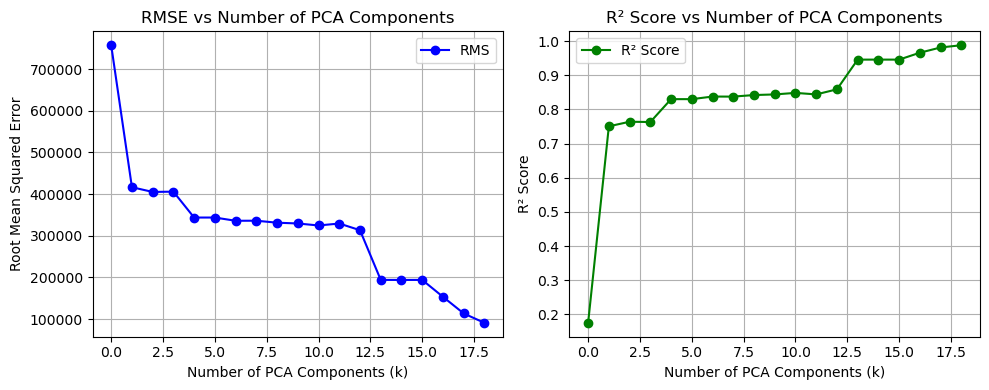

In [45]:
plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 1)
plt.plot(rms_list, marker='o', linestyle='-', color='b', label='RMS')
plt.xlabel('Number of PCA Components (k)')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs Number of PCA Components')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(r2_list, marker='o', linestyle='-', color='g', label='R² Score')
plt.xlabel('Number of PCA Components (k)')
plt.ylabel('R² Score')
plt.title('R² Score vs Number of PCA Components')
plt.legend()
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()

In [46]:
x_train, x_test, y_train, y_test = train_test_split(sample, y, train_size = 0.8, test_size = 0.2, random_state = 0)
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
    
mse = mean_squared_error(y_test, y_pred)
rms = np.sqrt(mse)
print(f'RMS Error: {rms:.3f}')

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.3f}')

RMS Error: 90876.813
R² Score: 0.988


Text(0, 0.5, 'Predicted')

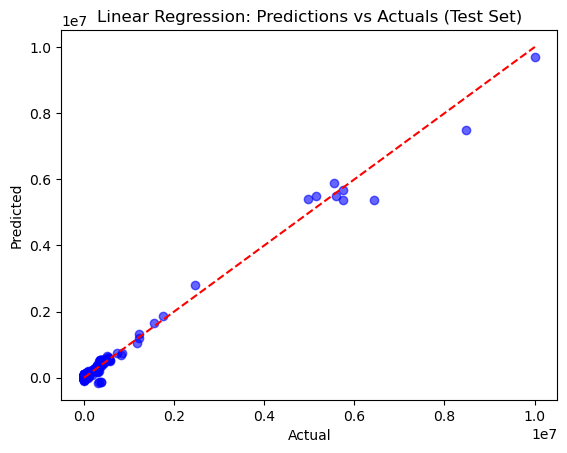

In [47]:
# Plot predictions vs actual values for the test set
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Linear Regression: Predictions vs Actuals (Test Set)")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [48]:
pca = PCA(n_components=13)
principalNP = pca.fit_transform(sample)
x_train, x_test, y_train, y_test = train_test_split(principalNP, y, train_size = 0.8, test_size = 0.2, random_state = 0)
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
    
mse = mean_squared_error(y_test, y_pred)
rms = np.sqrt(mse)
print(f'RMS Error: {rms:.3f}')

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.3f}')

RMS Error: 313294.749
R² Score: 0.859


Text(0, 0.5, 'Predicted')

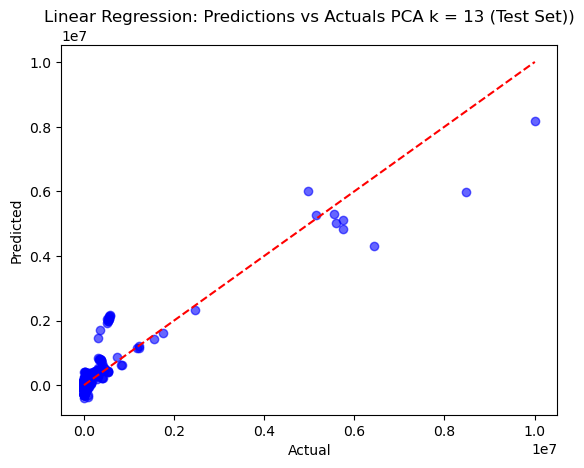

In [49]:
# Plot predictions vs actual values for the test set
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Linear Regression: Predictions vs Actuals PCA k = 13 (Test Set))")
plt.xlabel("Actual")
plt.ylabel("Predicted")